In [1]:
#!nvidia-smi

In [2]:
#%env CUDA_DEVICE_ORDER=PCI_BUS_ID
#%env CUDA_VISIBLE_DEVICES=5

In [3]:
import os
import numpy as np
from scipy.misc import imread, imresize
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [4]:
img_width = 28
img_height = 28

tfrecord_train = 'fashion_train.tfrecord'
tfrecord_val = 'fashion_val.tfrecord'
tfrecord_dir = 'tfrecords'

In [5]:
cur_dir = os.getcwd()
image_dir = os.path.join(cur_dir, '..', 'images_fashion')
valid_exts = ['.png']
print ("images should be stored in {}".format(image_dir))

images should be stored in c:\Work\FC_TF_course\..\images_fashion


### [Label Name]

0 : T-shirt/top

1 : Trouser

2 : Pullover

3 : Dress

4 : Coat

5 : Sandal

6 : Shirt

7 : Sneaker

8 : Bag

9 : Ankle boot

In [16]:
label_file = 'labels.csv'
label_path = os.path.join(image_dir, label_file)

labels = np.loadtxt(label_path, delimiter=',', dtype=np.int64)
print(labels.shape)

(60000,)


In [7]:
imglist = []
filelist = os.listdir(image_dir)
for f in filelist:
    ext = os.path.splitext(f)[-1]
    if ext.lower() not in valid_exts:
        continue
    imglist.append(f)
print ("{} images are found".format(len(imglist)))

60000 images are found


In [8]:
imglist[0:10]

['0.png',
 '1.png',
 '10.png',
 '100.png',
 '1000.png',
 '10000.png',
 '10001.png',
 '10002.png',
 '10003.png',
 '10004.png']

In [9]:
random.shuffle(imglist)
imglist[0:10]

['11863.png',
 '29866.png',
 '35585.png',
 '57744.png',
 '21806.png',
 '24754.png',
 '52197.png',
 '21168.png',
 '58264.png',
 '4661.png']

In [10]:
numfiles = len(imglist)
img_train = imglist[:int(5/6*numfiles)]
img_val = imglist[int(5/6*numfiles):]
len(img_train), len(img_val)

(50000, 10000)

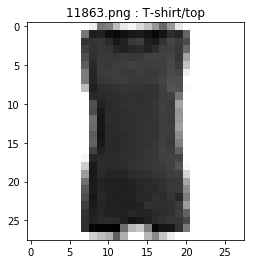

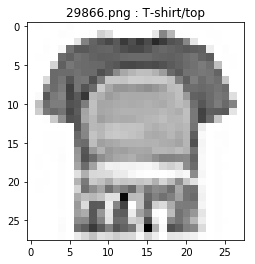

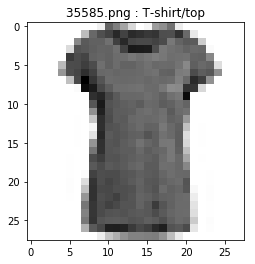

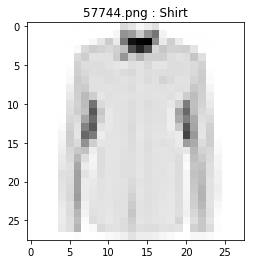

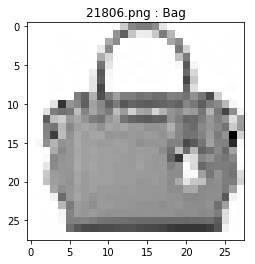

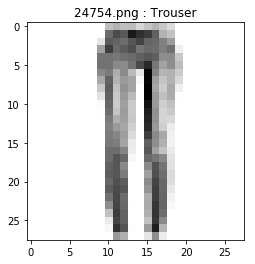

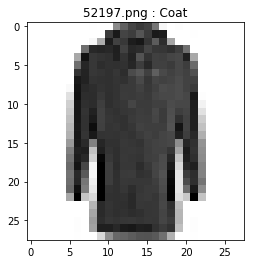

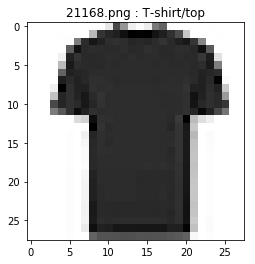

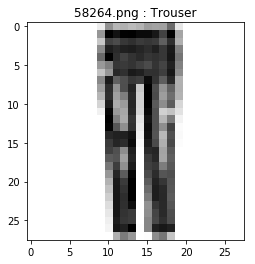

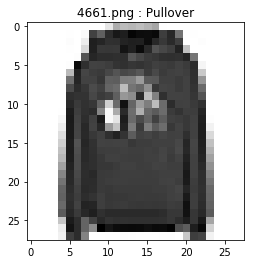

In [11]:
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for tempimg in imglist[0:10]:
    idx = int(os.path.splitext(tempimg)[0])
    label = labels[idx]
    img_path = os.path.join(image_dir, tempimg)
    image = np.array(imread(img_path))
    image = imresize(image, [img_height, img_width])
    plt.title("{} : {}".format(tempimg, label_name[label]))
    plt.imshow(image, cmap='Greys', interpolation='nearest')
    plt.show()

In [12]:
writer_train = tf.python_io.TFRecordWriter(os.path.join(cur_dir, tfrecord_dir, tfrecord_train))
writer_val  = tf.python_io.TFRecordWriter(os.path.join(cur_dir, tfrecord_dir, tfrecord_val))

In [13]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [14]:
for imgname in img_train:
    idx = int(os.path.splitext(imgname)[0])
    label = labels[idx]
    img_path = os.path.join(image_dir, imgname)
    image = np.array(imread(img_path))
    image = imresize(image, [img_height, img_width])
    image_str = image.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(image_str),
        'label': _int64_feature(label)
    }))
    writer_train.write(example.SerializeToString())

In [15]:
for imgname in img_val:
    idx = int(os.path.splitext(imgname)[0])
    label = labels[idx]
    img_path = os.path.join(image_dir, imgname)
    image = np.array(imread(img_path))
    image = imresize(image, [img_height, img_width])
    image_str = image.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(image_str),
        'label': _int64_feature(label)
    }))
    writer_val.write(example.SerializeToString())